In [70]:
import fastf1 
from fastf1 import get_session
import pandas as pd 
import numpy as np 

fastf1.Cache.enable_cache('../data/cache/')

In [279]:
# Function to collect race data 
def getRaceData(track, year):
    session = get_session(year, track, 'Race')
    session.load()

    laps = session.laps
    results = session.results
    
    drivers = laps['DriverNumber'].unique()
    drivers_telemetry = pd.DataFrame()
    
    
    for driver in drivers:
        telemetry = session.laps.pick_driver(driver).get_telemetry()
        telemetry['DriverNumber'] = driver
        drivers_telemetry = pd.concat([drivers_telemetry, telemetry], ignore_index=True)

    drivers_telemetry['Time'] = drivers_telemetry['SessionTime']
    weather = session.weather_data
    race_controlmsg = session.race_control_messages
    track_status = session.track_status
    
    # Sort all dataframes by 'Time' (ascending order)
    laps = laps.sort_values(by='Time')
    weather = weather.sort_values(by='Time')    
    track_status = track_status.sort_values(by='Time')
    
    # Perform the nearest merge using merge_asof
    df = pd.merge_asof(laps, weather, on='Time', direction='nearest')
    df = pd.merge_asof(df, track_status, on='Time', direction='nearest')
    df = pd.merge(df, results, on = 'DriverNumber')
    df.rename(columns={'Time_x': 'Time'}, inplace=True)
    # Sort both dataframes by 'DriverNumber' and 'Time'
    df = df.sort_values(by=['Time'])
    drivers_telemetry = drivers_telemetry.sort_values(by=[ 'Time'])
    
    # Perform the merge_asof, ensuring the closest time is matched but not exactly equal
    df = pd.merge_asof(df, drivers_telemetry, on='Time', by='DriverNumber', direction='nearest')
    
    df = df.sort_values('Time')
    
    return results, laps, drivers_telemetry, weather, race_controlmsg, track_status, df
    

In [281]:
results, laps, drivers_telemetry, weather, race_controlmsg, track_status, df = getRaceData('Silverstone', 2024)

core           INFO 	Loading data for British Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
core        WARNING 	Failed to preserve data type for column '

In [288]:
df.to_csv('../data/race.csv')

In [286]:
df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,0 days 00:59:51.010000,GAS,10,NaT,1.0,1.0,NaT,NaT,NaT,NaT,...,0,False,1,interpolation,0.000000,NaN,OnTrack,-581.000000,2346.000000,1986.000000
1,0 days 00:59:51.010000,RUS,63,0 days 00:01:35.211000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.497000,...,100,False,1,car,5707.704722,0.029783,OnTrack,-1741.113735,1230.197450,1963.037564
2,0 days 00:59:51.833000,HAM,44,0 days 00:01:36.034000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.703000,...,100,False,0,car,5716.444444,0.018911,OnTrack,-1680.980851,1310.052202,1964.061319
3,0 days 00:59:52.510000,VER,1,0 days 00:01:36.711000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.975000,...,100,False,0,car,5745.935833,0.018992,OnTrack,-1709.489676,1272.797170,1963.759122
4,0 days 00:59:53.146000,NOR,4,0 days 00:01:37.347000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.340000,...,99,False,0,car,5744.523333,0.018998,OnTrack,-1722.300538,1255.860444,1963.676033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,0 days 02:21:46.435000,ALO,14,0 days 00:01:31.430000,52.0,3.0,NaT,NaT,0 days 00:00:29.311000,0 days 00:00:37.163000,...,99,False,0,interpolation,302408.374252,0.999919,OnTrack,-1738.725292,1231.543285,1963.062128
957,0 days 02:21:51.245000,ALB,23,0 days 00:01:29.718000,52.0,3.0,NaT,NaT,0 days 00:00:29.121000,0 days 00:00:36.186000,...,100,False,0,interpolation,302483.702796,0.999970,OnTrack,-1741.869462,1227.143661,1963.157290
958,0 days 02:22:02.161000,TSU,22,0 days 00:01:32.090000,52.0,3.0,NaT,NaT,0 days 00:00:29.552000,0 days 00:00:36.953000,...,100,False,0,interpolation,302450.547666,0.999998,OnTrack,-1674.320436,1320.917725,1963.718860
959,0 days 02:22:11.818000,SAR,2,0 days 00:01:32.088000,52.0,3.0,NaT,NaT,0 days 00:00:29.780000,0 days 00:00:37.110000,...,100,False,0,interpolation,301863.385039,0.999993,OnTrack,-1701.205960,1281.766898,1963.134875


In [300]:
drivers_telemetry.sort_values(by = 'Time', ascending=True)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,DriverNumber
0,2024-07-07 14:03:12.541,0 days 00:58:15.512000,,0.088889,0 days 00:58:15.512000,8973,0,1,20,False,1,interpolation,0.019788,6.546055e-08,OnTrack,-1094.889589,2081.129468,1972.000019,44
37779,2024-07-07 14:03:12.541,0 days 00:58:15.512000,,0.088889,0 days 00:58:15.512000,10161,0,1,17,True,1,interpolation,0.019723,6.519062e-08,OnTrack,-1181.912749,1962.109115,1969.999614,1
709831,2024-07-07 14:03:12.541,0 days 00:58:15.512000,,0.088889,0 days 00:58:15.512000,0,0,0,0,False,1,interpolation,0.000000,NaN,OnTrack,-581.000000,2346.000000,1986.000000,10
342337,2024-07-07 14:03:12.541,0 days 00:58:15.512000,,0.088889,0 days 00:58:15.512000,10747,0,1,21,True,1,interpolation,0.020073,6.636816e-08,OnTrack,-1630.934985,1373.061261,1964.000018,22
75568,2024-07-07 14:03:12.541,0 days 00:58:15.512000,,0.088889,0 days 00:58:15.512000,9972,0,1,21,False,1,interpolation,0.013588,4.493837e-08,OnTrack,-1142.912731,2014.131796,1971.000019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457576,2024-07-07 15:27:09.597,0 days 02:22:12.568000,,54.665278,0 days 02:22:12.568000,11460,249,6,100,False,0,car,302873.782222,9.998783e-01,OnTrack,-1930.260741,971.642470,1962.419347,20
457577,2024-07-07 15:27:09.692,0 days 02:22:12.663000,,54.665278,0 days 02:22:12.663000,11536,250,6,100,False,0,pos,302880.426982,9.999002e-01,OnTrack,-1891.000000,1026.000000,1963.000000,20
457578,2024-07-07 15:27:09.852,0 days 02:22:12.823000,,54.665278,0 days 02:22:12.823000,11612,252,6,100,False,0,pos,302891.715022,9.999375e-01,OnTrack,-1825.000000,1117.000000,1963.000000,20
457579,2024-07-07 15:27:09.957,0 days 02:22:12.928000,,54.665278,0 days 02:22:12.928000,11689,254,6,100,False,0,car,302899.182222,9.999621e-01,OnTrack,-1766.431878,1195.575764,1963.185177,20


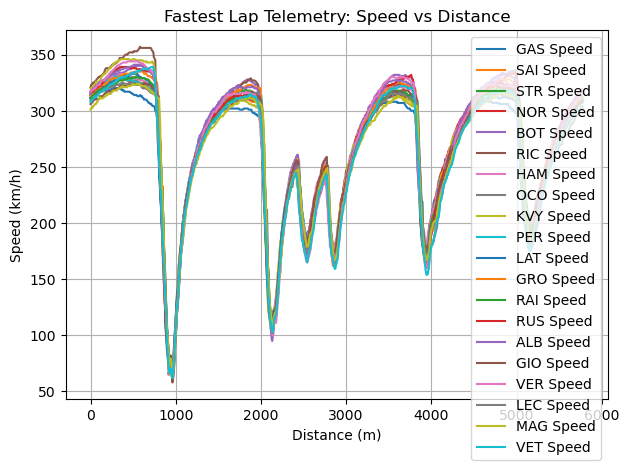

In [68]:
from matplotlib import pyplot as plt

drivers_to_plot = drivers_PFLtelemetry.keys()
for driver in drivers_to_plot:
    telemetry = drivers_PFLtelemetry[driver]
    
    # Plot speed vs. distance
    plt.plot(telemetry['Distance'], telemetry['Speed'], label=f"{driver} Speed")

# Add title, labels, and legend
plt.title("Fastest Lap Telemetry: Speed vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()